<a href="https://colab.research.google.com/github/sanaomaro/AIM-5001/blob/main/S_Omar_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
import plotly.figure_factory as ff
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder



# **Part 1: A brief summary of the data**

**from the dataset original discription:**
"Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure."
found at: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?datasetId=727551&sortBy=voteCount&types=null


**Part 1.cont: the research question:**

This Heart Disease data set contains several factors that could affect the fact of getting a heart disease or not, it includes several data types from categorical such as somking and diabetes columns to quanitative data such as serum sodium and platets values columns.

we are trying here to answer the research question: 
which of these factors "columns" can be considered a cuase or an attribute that has high contribution for getting a heart disease?

# **Part 2: Data Summary** – Use cases and summary.

**Categorical fields:**

*   Sex - Gender of patient Male = 1, Female =0
*   Age - Age of patient
*   Diabetes - 0 = No, 1 = Yes
*   Anaemia - 0 = No, 1 = Yes: 
    (Decrease of red blood cells or hemoglobin (boolean))
*   High_blood_pressure - 0 = No, 1 = Yes
*   Smoking - 0 = No, 1 = Yes
*   DEATH_EVENT - 0 = No, 1 = Yes: 
    (If the patient deceased during the follow-up period)


 **Quanitative fields:**

*   creatinine_phosphokinase: 
    (Level of the CPK enzyme in the blood (mcg/L))
*   ejection_fraction explanation: 
    (Percentage of blood leaving the heart at each contraction (percentage))
*   platelets: 
    (Platelets in the blood (kiloplatelets/mL))
*   serum_creatinine: 
    (Level of serum creatinine in the blood (mg/dL))
*   serum_sodium: 
    (Level of serum sodium in the blood (mEq/L))
*   time: 
    (Follow-up period (days))

According to datacamp article: "Data science use cases can be a problem to be resolved, a hypothesis to be checked, or a question to be answered. Essentially, doing data science means solving real-world use cases."



In [156]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [157]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [159]:
df.shape

(299, 13)

In [160]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000



---


* We check for two important features: null data and outliers *

---



In [161]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

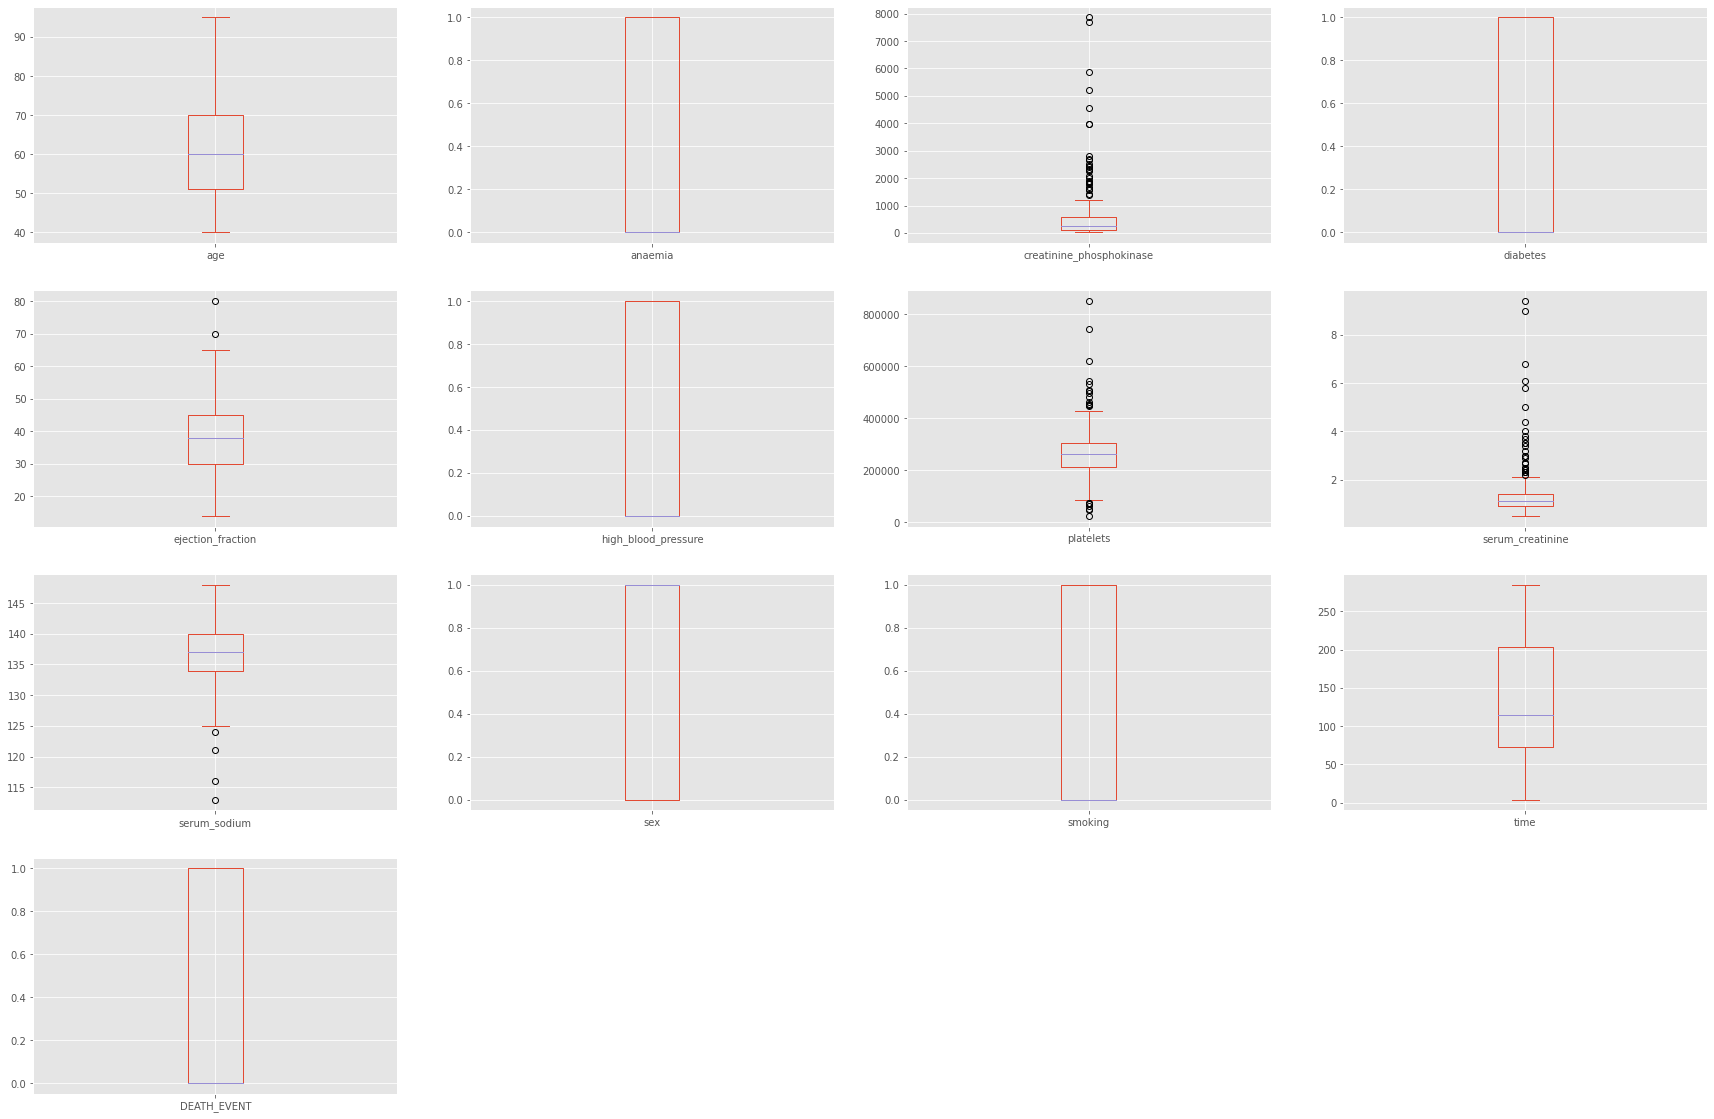

In [162]:
#the best method to check for outliers is plotting a boxplot
fig = plt.figure(figsize=(30, 20))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()



---

Except for the categorical attributes, we notice lots of outliers in:
[ceratinine phosphokinase, serum cretanine, and platetes]


---





---


So, the second thing comes to mind is checking the density

---



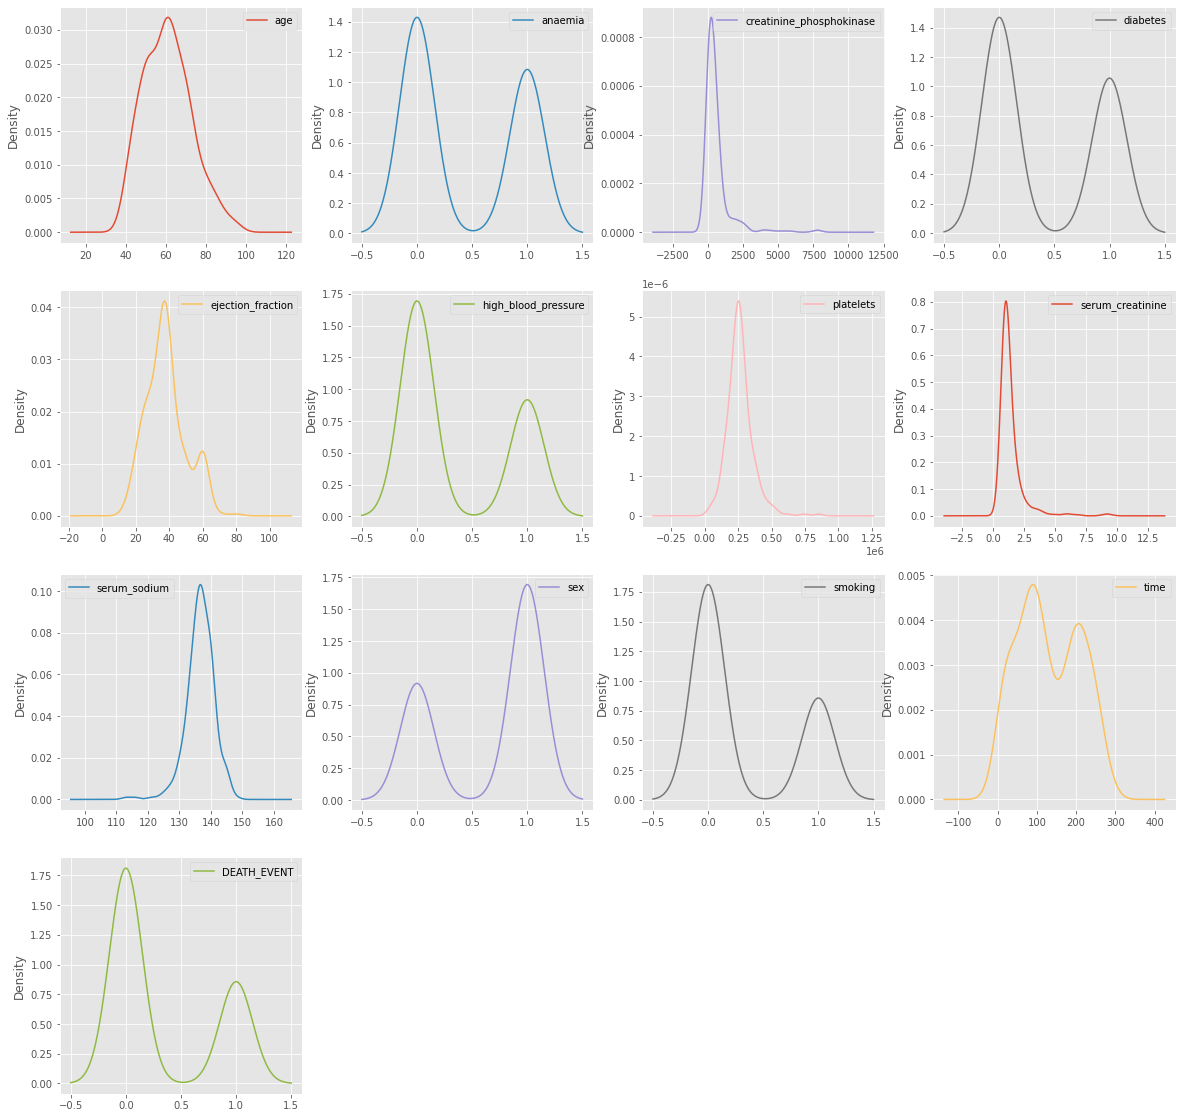

In [163]:

#important resource https://towardsdatascience.com/10-examples-to-master-distribution-plots-with-python-seaborn-4ea2ceea906a
#https://seaborn.pydata.org/tutorial/distributions.html
#sns.displot(data=df, x=df, kind="kde", aspect=1.4, log_scale=10)

fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

#https://www.python-graph-gallery.com/70-basic-density-plot-with-seaborn


# Part 4: Exploratory Data Analysis (EDA)

In [147]:
#exploring how many death cases do we have

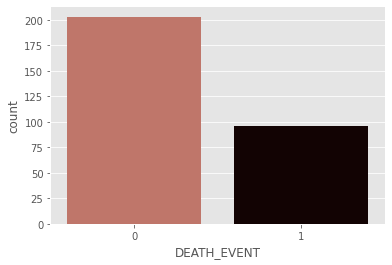

In [164]:

cols= ["#CD6C5C","#150000"]
ax = sns.countplot(x= df["DEATH_EVENT"], palette= cols)


In [165]:
hist_data =[df["diabetes"].values]
group_labels = ['diabetes'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Diabetes Distribution plot')

fig.show()


---
BEFORE any further graphical inspection for attributes,

Lets test the correlation matrix between them to investigate how much each attribute is dependable on another one, or how much each of them is correlated to death event.


---



In [166]:
Corr_Matrix = round(df.corr(),3)
print(Corr_Matrix)

                            age  anaemia  creatinine_phosphokinase  diabetes  \
age                       1.000    0.088                    -0.082    -0.101   
anaemia                   0.088    1.000                    -0.191    -0.013   
creatinine_phosphokinase -0.082   -0.191                     1.000    -0.010   
diabetes                 -0.101   -0.013                    -0.010     1.000   
ejection_fraction         0.060    0.032                    -0.044    -0.005   
high_blood_pressure       0.093    0.038                    -0.071    -0.013   
platelets                -0.052   -0.044                     0.024     0.092   
serum_creatinine          0.159    0.052                    -0.016    -0.047   
serum_sodium             -0.046    0.042                     0.060    -0.090   
sex                       0.065   -0.095                     0.080    -0.158   
smoking                   0.019   -0.107                     0.002    -0.147   
time                     -0.224   -0.141

                          creatinine_phosphokinase  ejection_fraction  \
creatinine_phosphokinase                  1.000000          -0.044080   
ejection_fraction                        -0.044080           1.000000   
platelets                                 0.024463           0.072177   
serum_creatinine                         -0.016408          -0.011302   
serum_sodium                              0.059550           0.175902   
time                                     -0.009346           0.041729   

                          platelets  serum_creatinine  serum_sodium      time  
creatinine_phosphokinase   0.024463         -0.016408      0.059550 -0.009346  
ejection_fraction          0.072177         -0.011302      0.175902  0.041729  
platelets                  1.000000         -0.041198      0.062125  0.010514  
serum_creatinine          -0.041198          1.000000     -0.189095 -0.149315  
serum_sodium               0.062125         -0.189095      1.000000  0.087640  
time    

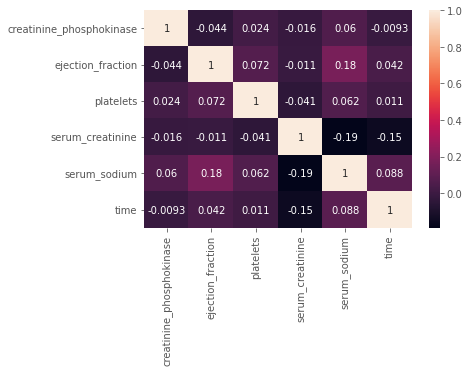

In [167]:
#lets try to use only the numeric columns
numeric_colmns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
corretn_matrx = df.loc[:,numeric_colmns].corr()
print(corretn_matrx)
sns.heatmap(corretn_matrx, annot=True)

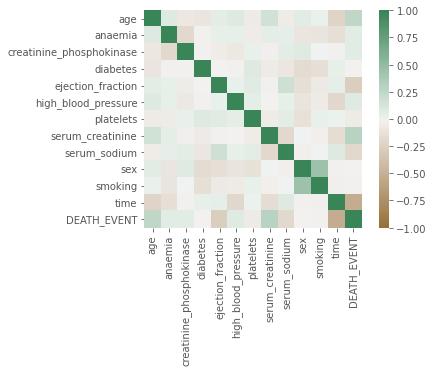

In [168]:
#A heatmap for all features colored would be better


corr_H_Failure = df.corr()

axis_corr = sns.heatmap(
corr_H_Failure,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

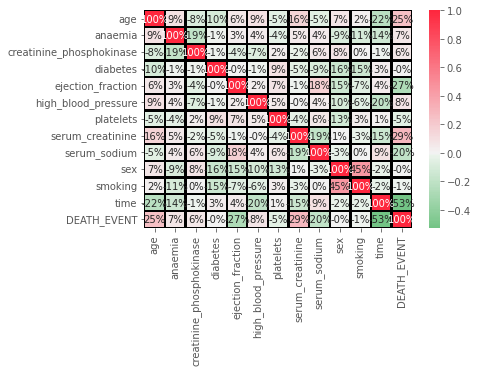

In [169]:
#a heatmap colored would be better
#ow I set colors for the heatmap
#https://stackoverflow.com/questions/56536419/how-to-set-center-color-in-heatmap

corr_H_Failure = df.corr()

fig, ax = plt.subplots()
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(corr_H_Failure, cmap=rdgn, center=0.00, annot=True, fmt ='.0%', 
            linewidths=1.3, linecolor='black', cbar=True, ax=ax)

plt.show()



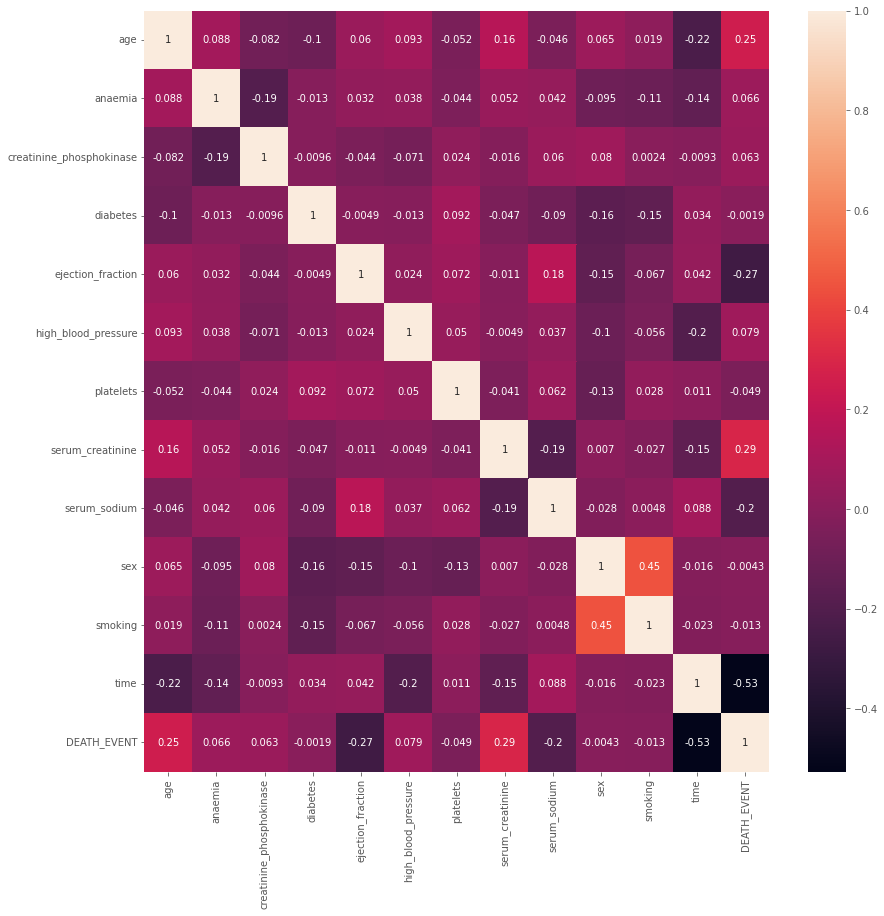

In [170]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True)
plt.show()
#this is the clearest attempt



---


We notice that the correlation between DEATH EVENT and the two attributes (serum_cretanine, age) are (0.29, 0.25) respectivly the highest in all attributes.

---



I suppose we might need to check linearity relationships


---



ValueError: ignored

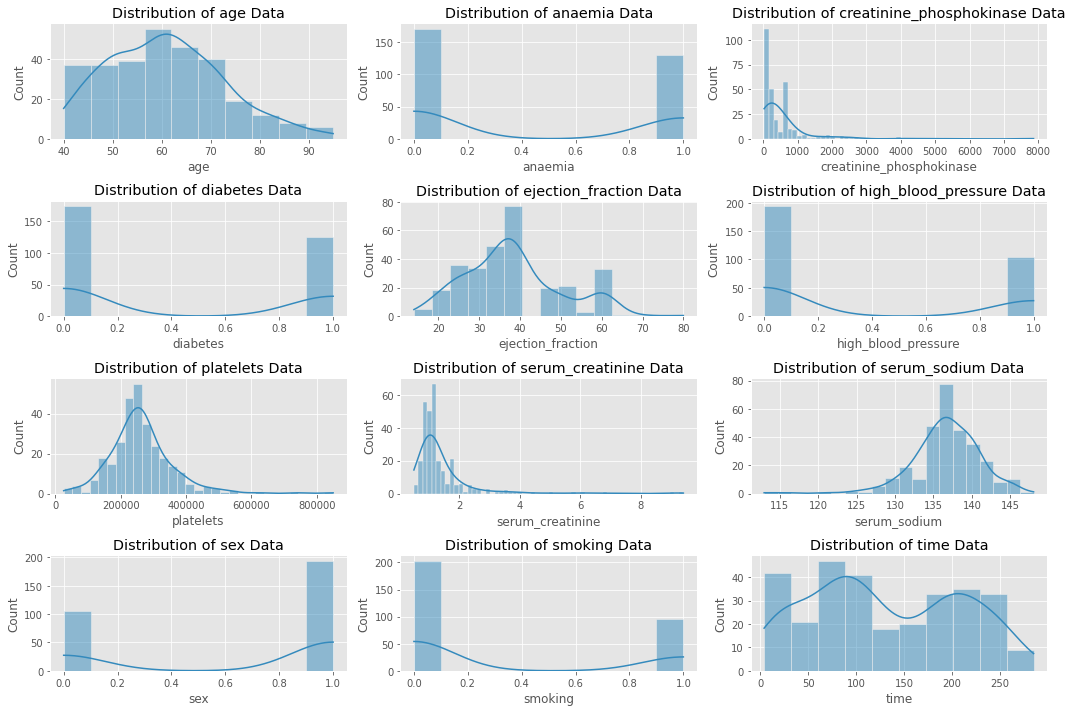

In [173]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()


---
Let's further visualize the relationship between death event and gender
---


In [174]:
# Shows the Distribution of Death event with respect to gender type
fig=px.histogram(df, 
                 x="DEATH_EVENT",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Death Event with respect to the sex",
                 barmode="group")
fig.show()

*Men are twice as women to face death due to hearth failure*
---


**We can visualize each atrribute vs DEATH EVENT**

In [175]:
import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of Ejection fraction Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "Ejection Fraction"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()


---

**Ejection fraction **causes more death events when its at the range 35-39, and
generally it cause death in the wider range from 20-39.
While creatinine_phosphokinase causes more death when it is at its lowest range from 0-199 with 40 death events.

---



Instead of drawing each one alone, we can try combining them in one pairplot histogram figures

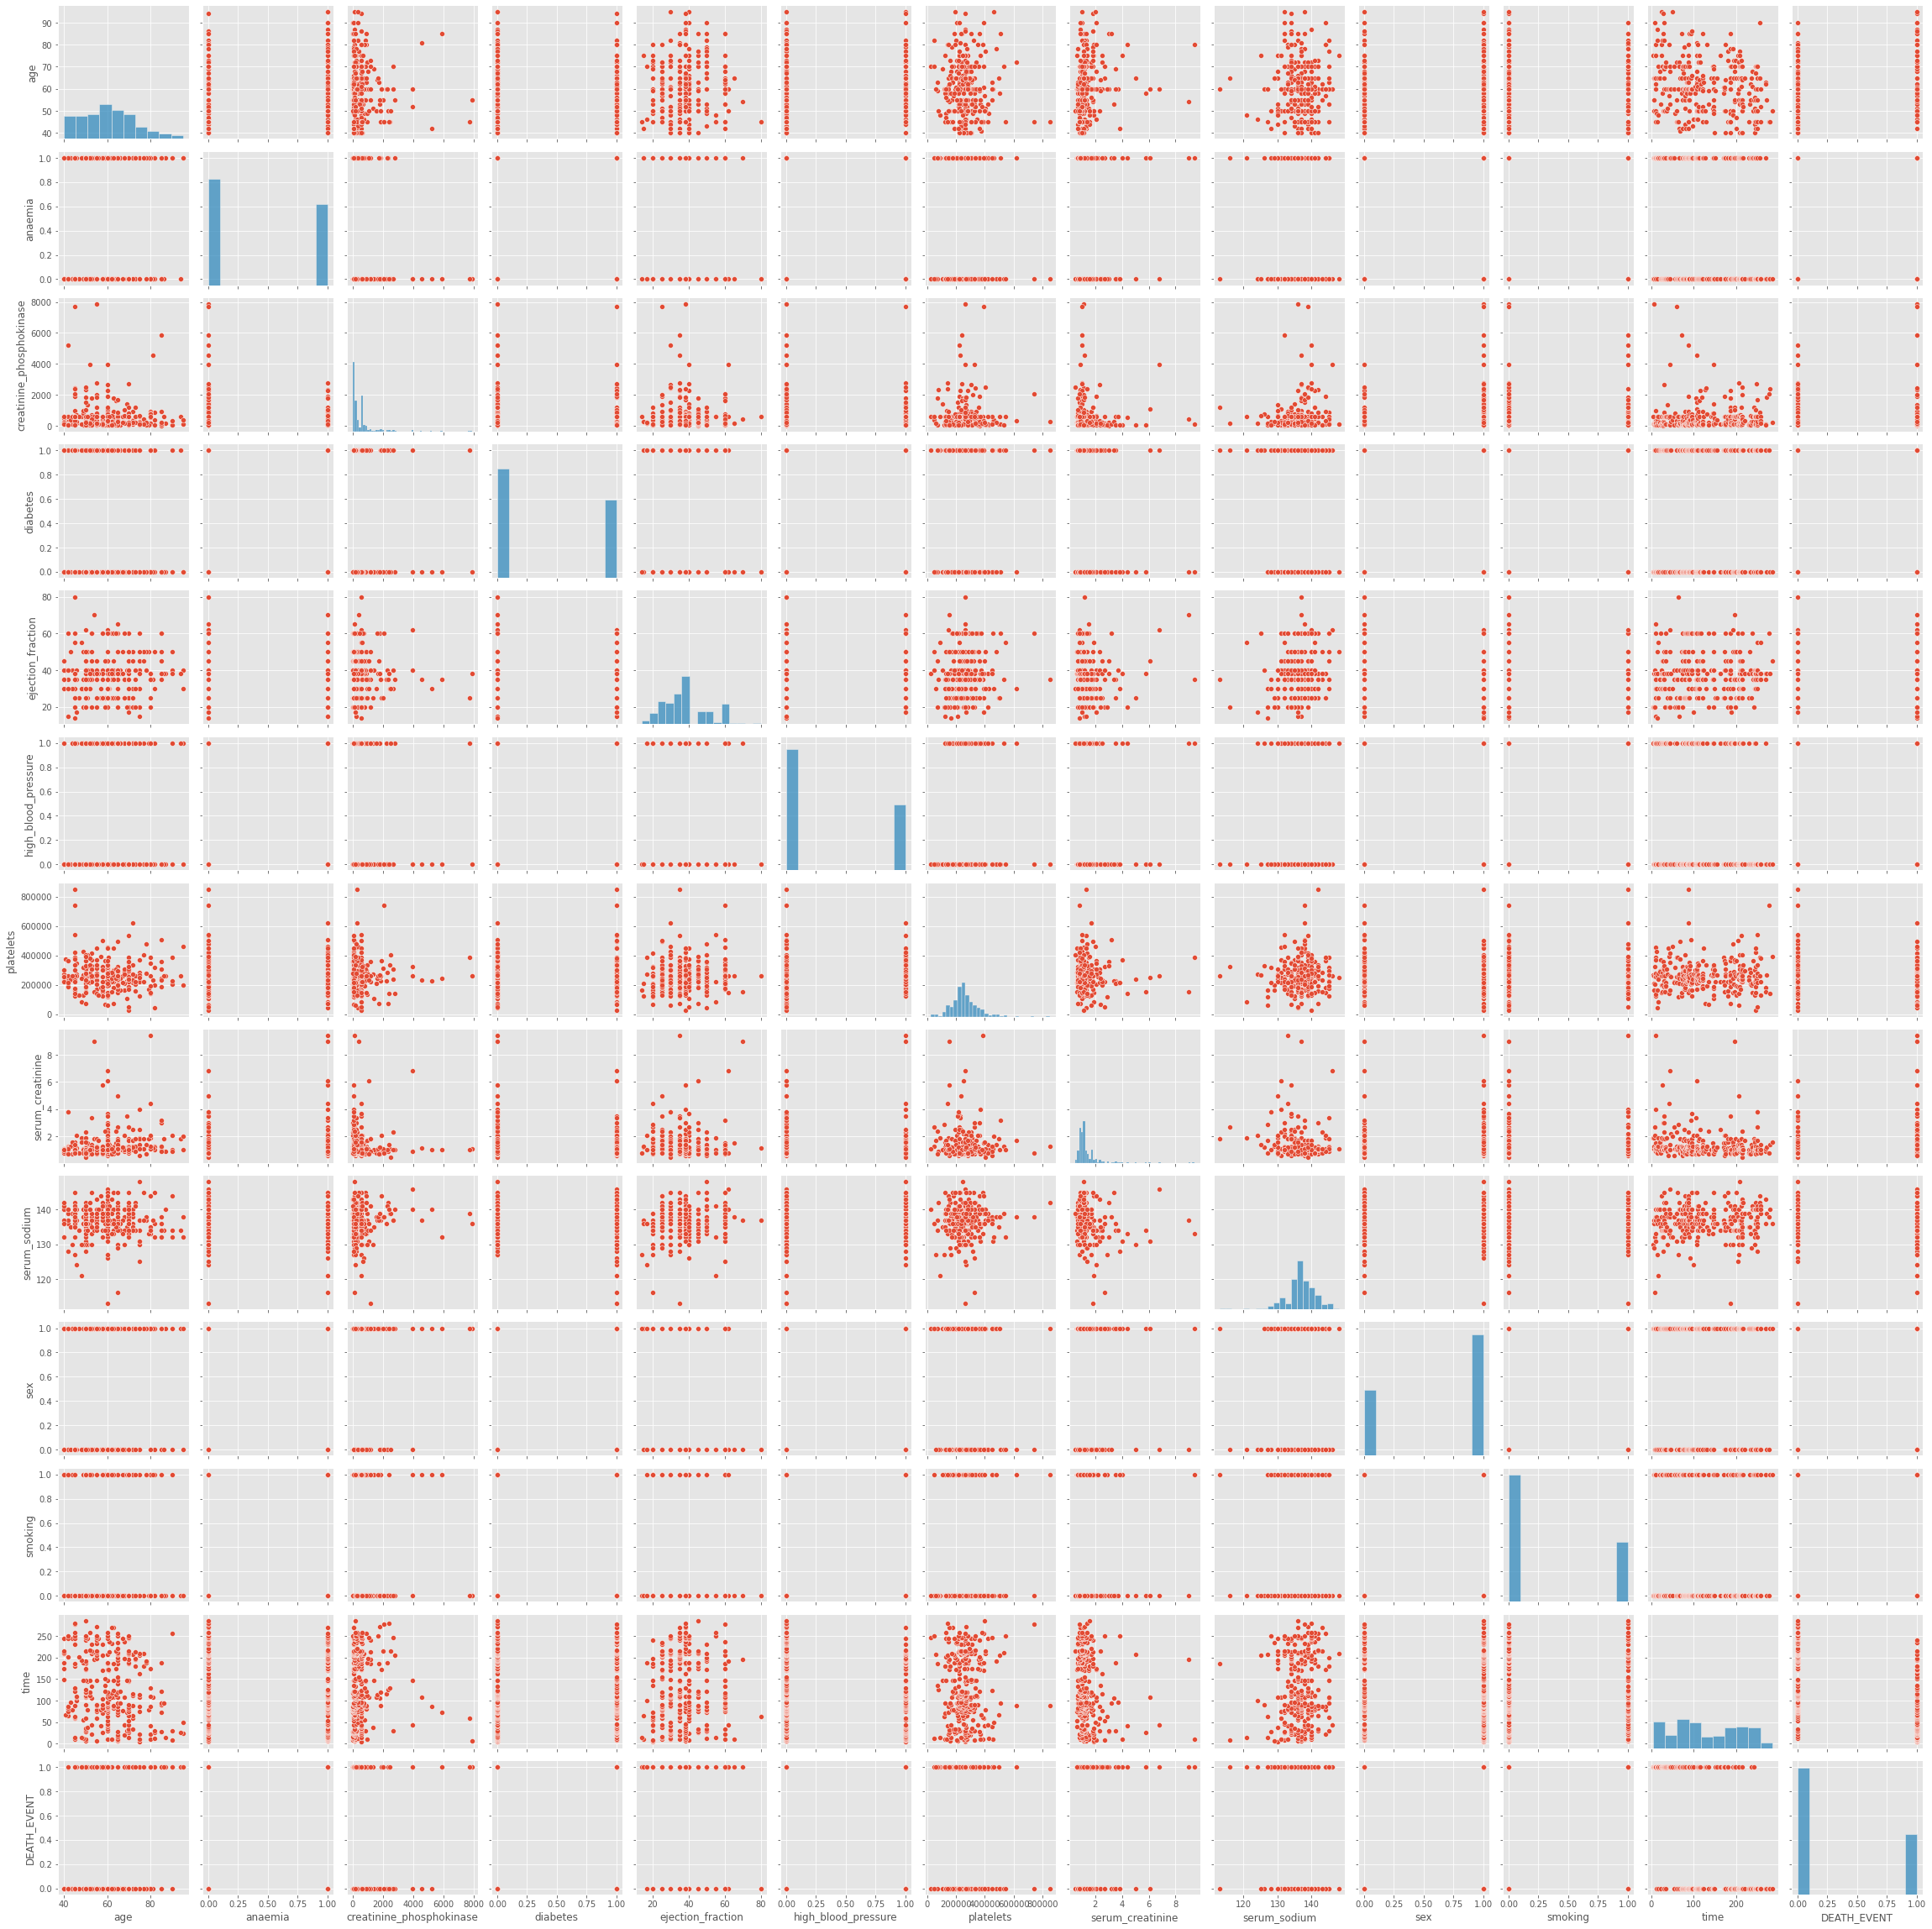

In [177]:
#df = sns.load_dataset("")
sns.pairplot(df)

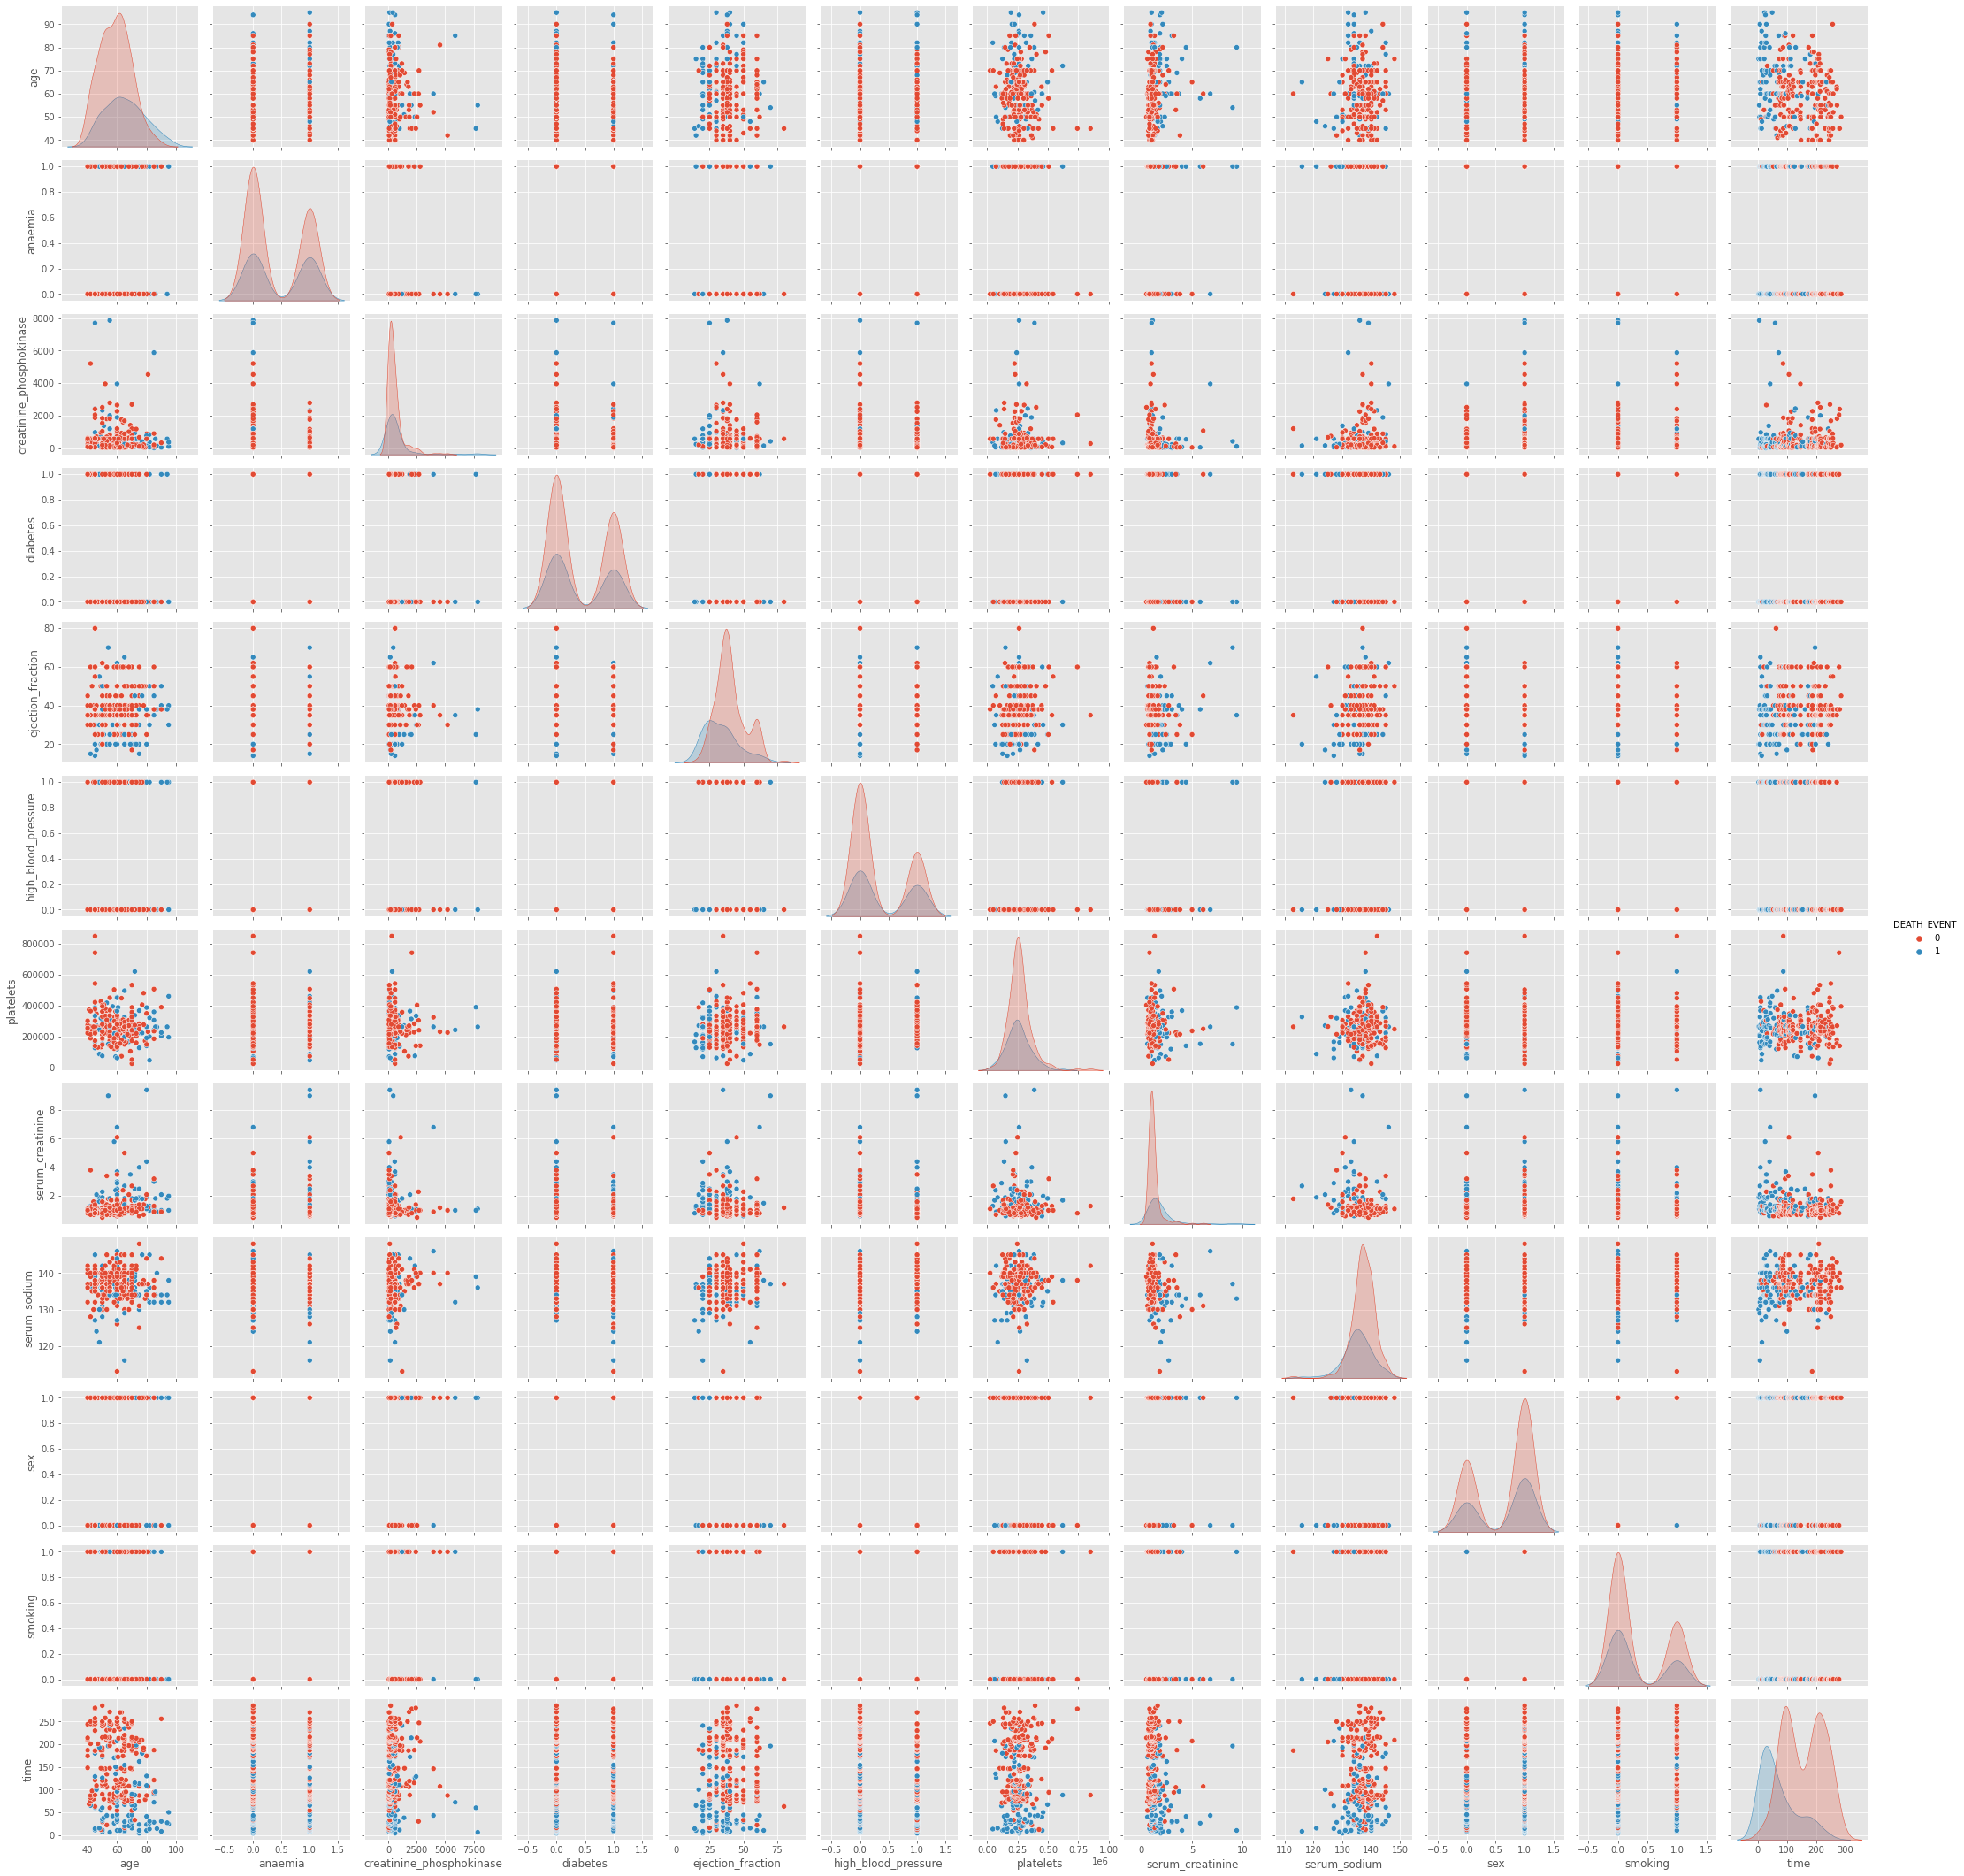

In [178]:
#Adding death event as a color to give meaning to the histograms
sns.pairplot(df, hue="DEATH_EVENT")

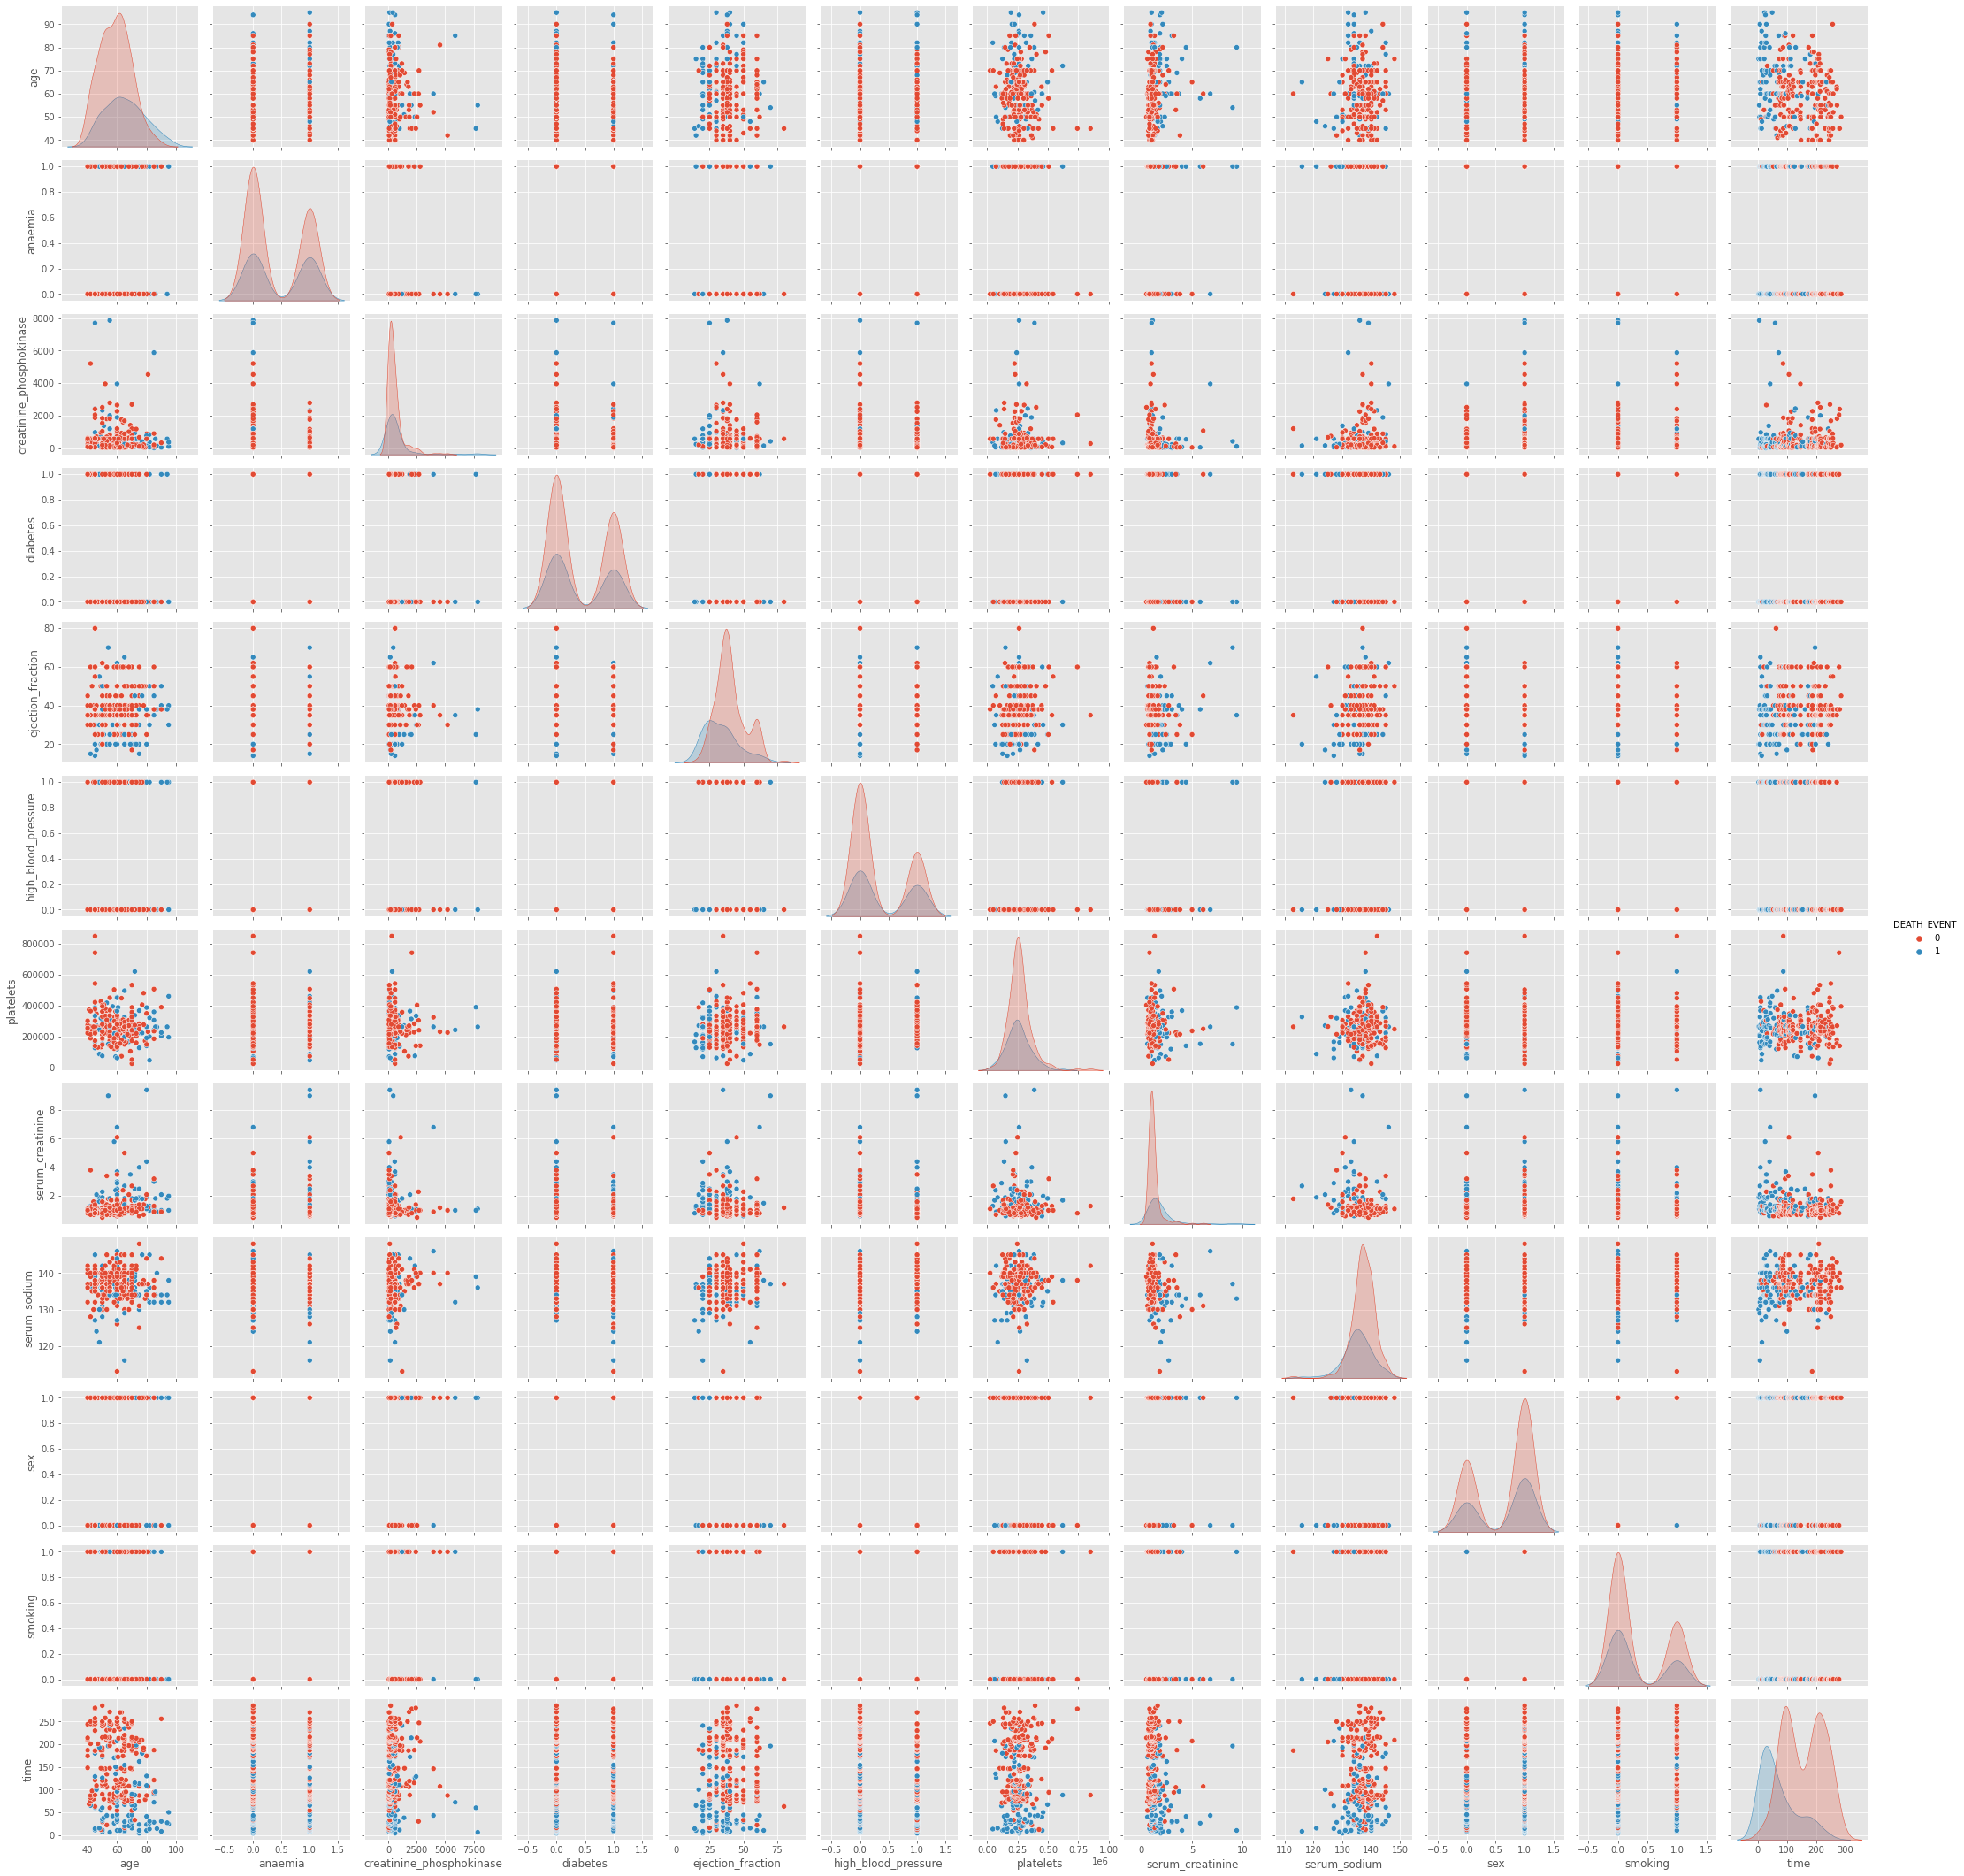

In [179]:


# loading dataset using seaborn
#df = sns.load_dataset("/content/heart_failure_clinical_records_dataset.csv")
# pairplot with hue day
sns.pairplot(df, hue ='DEATH_EVENT')
# to show
plt.show()

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html


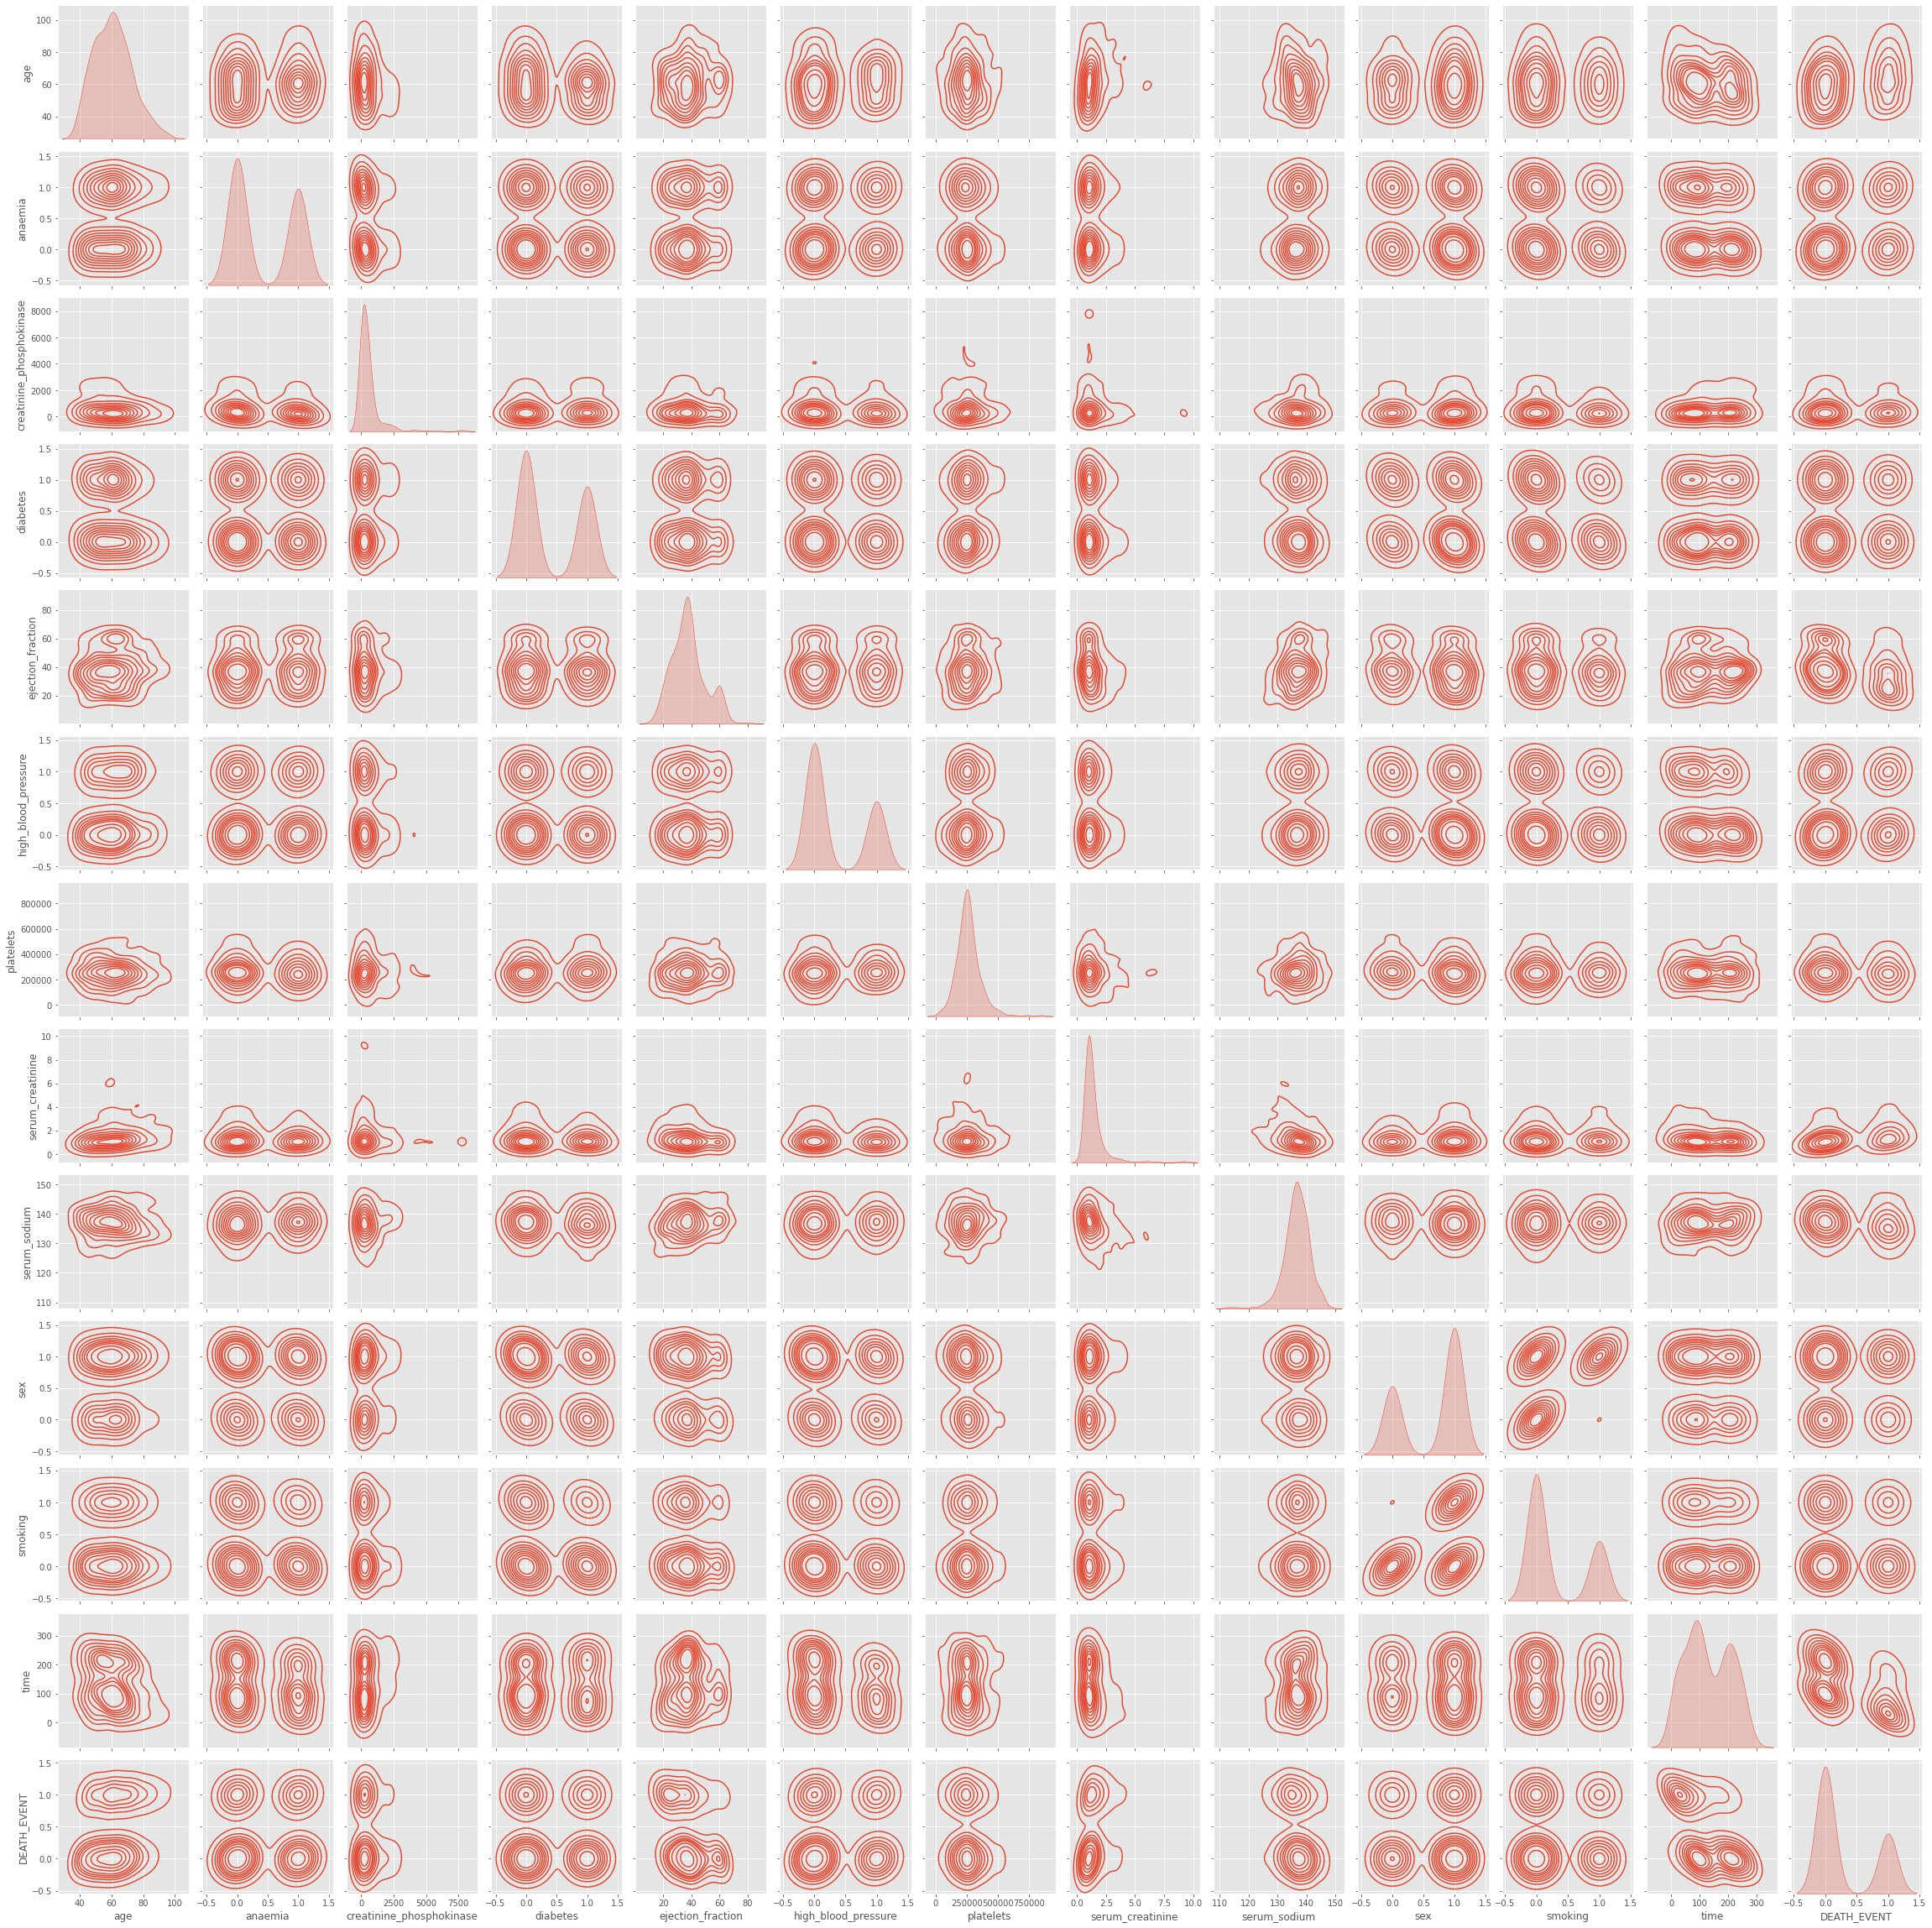

In [180]:
#density function for each
sns.pairplot(df, kind="kde")

# **Part 5: Inference**

# *We will focus on age and serum ceratinie first, they were the highest correlated attributes with death event.*

In [181]:
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [182]:
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()


---

The highest death rate happens when:

Serum cretanine is in the range 0.75 - 1.24

and when:

Age 58-62 followed by 68-72

---

# Field specific questions:
Lets inspect what is a good (safe) range of these attributes, normally?

so what are these attributes exactly?

FIRST: Ejection fraction
According to https://www.mayoclinic.org/tests-procedures/ekg/expert-answers/ejection-fraction/faq-20058286 
"Ejection fraction is a measurement of the percentage of blood leaving your heart each time it squeezes (contracts). It is just one of many tests your doctor may use to determine how your heart works"

Anormal range is: "A normal ejection fraction is about 50% to 75%, according to the American Heart Association.
A borderline ejection fraction can range between 41% and 50%."


Ejection fraction HAD -0.27 CORRELATION VALUE TO DEATH event from the corr matrix

In [183]:
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

From the plot it seems under 40 and above 20 ejection fraction contributes higly to death event 


Creatine phosphokinase (CPK):
accoridng to https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test

Creatine phosphokinase (CPK) is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. This article discusses the test to measure the amount of CPK in the blood.
Total CPK normal values:

10 to 120 micrograms per liter (mcg/L)

Strangly according to our previous figure the highest death events happend in the range 0- 199.

#serum cretanine: the highest contributer along with age to heart failure deaths.
According to https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646:

"A creatinine test is a measure of how well your kidneys are performing their job of filtering waste from your blood.

Creatinine is a chemical compound left over from energy-producing processes in your muscles. Healthy kidneys filter creatinine out of the blood. Creatinine exits your body as a waste product in urine"

"For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L)
For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)"

So, we figure it again considering gender factor


In [184]:
'''fig = px.violin(df, y="sex", x="serum_creatinine", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis death factor")
fig.show()'''
fig = px.histogram(df, y="serum_creatinine", x="sex", color="DEATH_EVENT")
fig.update_layout(title_text="Serum creatinine ranges in women and men")
fig.show()

it seems for men serum cretanine range upto 110.08 contributs to death event while the range up to 66.16 is the one that contributes to death event in women

Lastly, to make sure we are going to analyse the contributions of some other factors even though they showed low correlation to death events: such as diabetes and high blood pressure. 


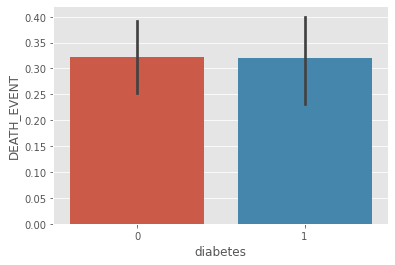

In [185]:
sns.barplot(x='diabetes', y='DEATH_EVENT', data=df)
plt.show()

It does not seem that diabetes realy contributes to death factor, it is almost 50, 50 with survival counts.

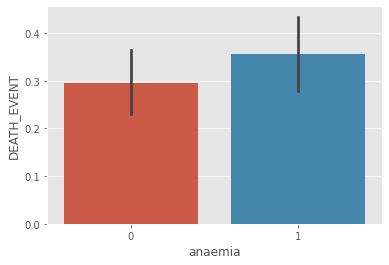

In [186]:
sns.barplot(x='anaemia', y='DEATH_EVENT', data=df)
plt.show()

Anemia has slightly more affct than diabetes, with 5% higher compared to zero death events

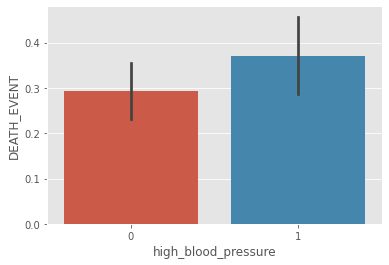

In [187]:
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=df)
plt.show()

High lood pressure cuases almost 38% contribution to death events, 7% higher than zero death events.

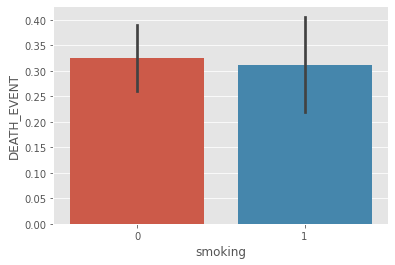

In [188]:
sns.barplot(x='smoking', y='DEATH_EVENT', data=df)
plt.show()

Smoking is strangely lower in the contribution factor.

# CONCLUSION and SUMMARY:
This analysis started by dividing attributes to categorical and quanitatves, then invetigating if there are any null values and how much is the outliers distributed -using box plots- through each of these attributes.
This led to drwaing the density distribution of each of them along with looking at the linear relationships in general.
An important result is that there are no null values, and there are some outliers in some of the attributes,
An important step, 
is using correlation matrix which was drawn several times to make sure it is the same result.
This yeilded that some attributes had mines values in contribution to death factor - which is the target here, some had higher contribution such as age and serum cretanine.

The second step was drawing general pair plots to look at the over all data using seaborn.
Then chosing some attributes based on the llok at corr matrix and pairplots to further investigate and draw.

By drawing the figures of distributions of the attributes that are expected to have effect on death events counts, we figure out the ranges of each factor that causes death either in men or women or general.

Then we further check the medical meaning of these attributes and try to make sense out of it by comparing them to the normal ranges in the field.

*Taking notes under each comparision/figure.*

**Quick conclusion**:

The higher the age the more important to look for serum_creatinine test as a cuase to Heart Failure

Refrences:
1. https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?datasetId=727551&sortBy=voteCount&types=null
2. https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction/notebook
3. https://stackoverflow.com/questions/56536419/how-to-set-center-color-in-heatmap
4.  https://towardsdatascience.com/10-examples-to-master-distribution-plots-with-python-seaborn-4ea2ceea906a
5. https://seaborn.pydata.org/tutorial/distributions.html
6. https://www.python-graph-gallery.com/70-basic-density-plot-with-seaborn
7. https://seaborn.pydata.org/generated/seaborn.pairplot.html
8. https://www.mayoclinic.org/tests-procedures/ekg/expert-answers/ejection-fraction/faq-20058286
9. https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test
10. https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646
11. https://www.datacamp.com/blog/data-science-use-cases-guide